## Setting up the dependencies

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
#!unzip spaceship-titanic.zip

## Loading the data and EDA

In [7]:
#!pip install pandas-profiling==2.7.1 

In [8]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [32]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
#from pandas_profiling import ProfileReport


In [10]:
df = pd.read_csv('train.csv')

In [11]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
df['PassengerId'][0].split('_')

['0001', '01']

In [13]:
df['Passenger_group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])

In [14]:
df['Passenger_group'].nunique()

6217

In [15]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [16]:
df.isna().sum()

PassengerId          0
HomePlanet         201
CryoSleep          217
Cabin              199
Destination        182
Age                179
VIP                203
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name               200
Transported          0
Passenger_group      0
dtype: int64

In [17]:
100 * df.isna().sum()/len(df)

PassengerId        0.000000
HomePlanet         2.312205
CryoSleep          2.496261
Cabin              2.289198
Destination        2.093639
Age                2.059128
VIP                2.335212
RoomService        2.082135
FoodCourt          2.105142
ShoppingMall       2.392730
Spa                2.105142
VRDeck             2.162660
Name               2.300702
Transported        0.000000
Passenger_group    0.000000
dtype: float64

In [22]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0008
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0012
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,0014
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True,9250
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,9257
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,9259
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,9274


In [24]:
df['Cabin'][0]

'B/0/P'

In [30]:
def cabin_deck(x):
  if pd.isnull(x):
    return np.nan
  else:
    return str(x).split('/')[0]

In [33]:
df['Cabin_Deck'] = df['Cabin'].apply(lambda x: cabin_deck(x))

In [34]:
def cabin_to_side(x):
  if pd.isnull(x):
    return np.nan
  else:
    return str(x).split('/')[-1]

In [35]:
df['Cabin_Side'] = df['Cabin'].apply(lambda x: cabin_to_side(x))

In [36]:
df.isna().sum()

PassengerId          0
HomePlanet         201
CryoSleep          217
Cabin              199
Destination        182
Age                179
VIP                203
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name               200
Transported          0
Passenger_group      0
Cabin_Deck         199
Cabin_Side         199
dtype: int64

In [37]:
df['Cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [38]:
df['Cabin_Side'].unique()

array(['P', 'S', nan], dtype=object)

In [19]:
#profile = ProfileReport(df=df,title='Spaceship Titanic', html={'style':{'full_width':True}})

In [20]:
#profile.to_notebook_iframe()

In [21]:
#profile.to_file('Space-Titanic.html')

In [39]:
df['Age'].mean()

28.82793046746535

In [40]:
df['Age'].median()

27.0

In [42]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Cabin_Deck,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,E,S


In [43]:
df.select_dtypes(include=['object']).columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Passenger_group', 'Cabin_Deck', 'Cabin_Side'],
      dtype='object')

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

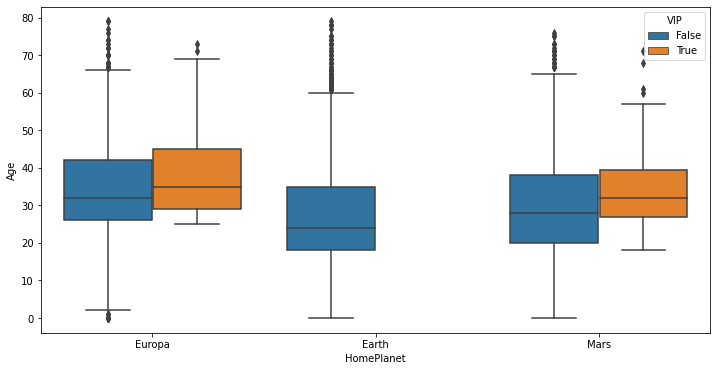

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='HomePlanet',y='Age', hue='VIP')

<AxesSubplot:xlabel='CryoSleep', ylabel='Age'>

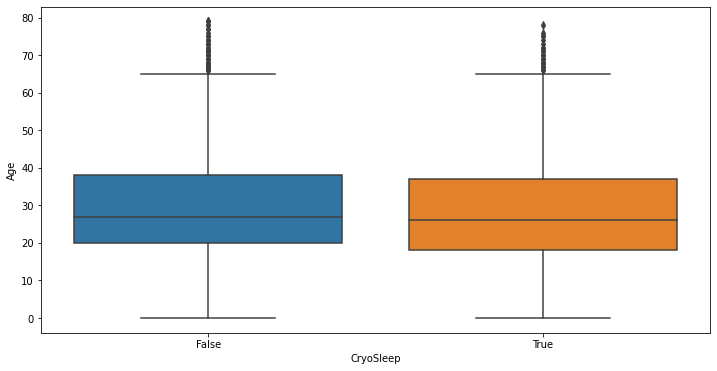

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='CryoSleep',y='Age')

<AxesSubplot:xlabel='VIP', ylabel='Age'>

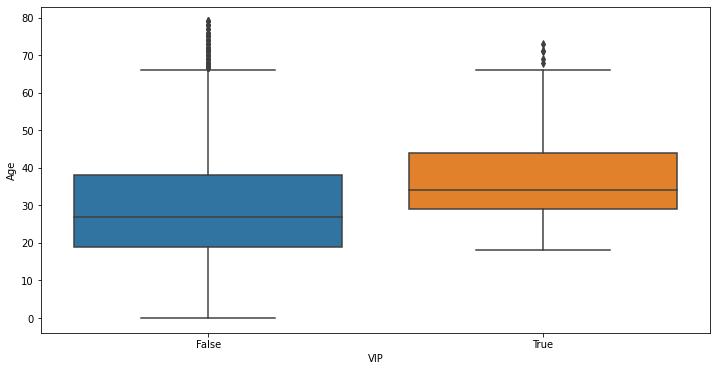

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='VIP',y='Age')

<AxesSubplot:xlabel='Cabin_Deck', ylabel='Age'>

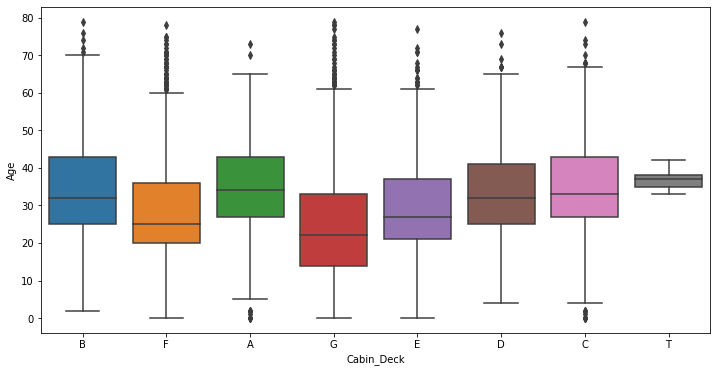

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Cabin_Deck',y='Age')

<AxesSubplot:xlabel='Cabin_Side', ylabel='Age'>

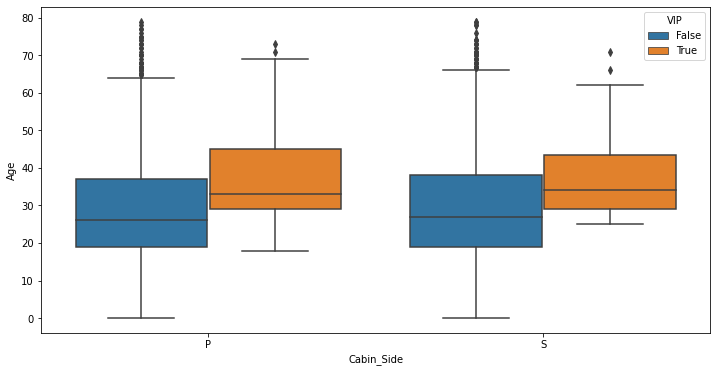

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Cabin_Side',y='Age', hue='VIP')

## To impute Age I think we can take VIP and HomePlant columns into account

In [247]:
def preprocessing(df):
  df['HomePlanet'].fillna('Missing', inplace=True)
  df['Destination'].fillna('Missing', inplace=True)
  df['CryoSleep'].fillna('Missing',inplace=True)
  df['VIP'].fillna('Missing',inplace=True)
  df['Cabin'].fillna('Missing', inplace=True)
  df['Age'].fillna(df['Age'].median(), inplace=True)
  df['Destination'].fillna('Missing',inplace=True)
  #df['VIP'].fillna()

  df['RoomService'].fillna(0,inplace=True)
  df['FoodCourt'].fillna(0,inplace=True)
  df['ShoppingMall'].fillna(0,inplace=True)
  df['Spa'].fillna(0,inplace=True)
  df['VRDeck'].fillna(0,inplace=True)
  df['Cabin_Deck'].fillna('Missing', inplace=True)
  df['Cabin_Side'].fillna('Missing', inplace=True)
  df.drop(['Name','Cabin'],axis=1,inplace=True)
  
  #df.dropna(inplace=True)
  
  return df

In [248]:
abt = df.copy() # ABT= Analytical Base Table

In [249]:
abt2 = preprocessing(abt)

In [250]:
abt2.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Passenger_group    0
Cabin_Deck         0
Cabin_Side         0
dtype: int64

In [251]:
len(df) == len(abt2)

True

In [252]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Cabin_Deck,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,E,S


In [253]:
abt2

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_group,Cabin_Deck,Cabin_Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,A,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,G,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,E,S


In [254]:
abt2['Passenger_group'].nunique()

6217

In [255]:
abt2.drop('Passenger_group',axis=1,inplace=True)

In [256]:
abt2['Cabin_Deck'].nunique()

9

In [257]:
abt2.drop('PassengerId',axis=1,inplace=True)

# Modelling

In [258]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [259]:
X = abt2.drop('Transported',axis=1)
y = abt2['Transported']

In [260]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,S


In [261]:
X2 = pd.get_dummies(X,columns=X.select_dtypes(include=['object']).columns, drop_first=False)

In [262]:
X2

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_Missing,Cabin_Deck_T,Cabin_Side_Missing,Cabin_Side_P,Cabin_Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [264]:
X_train.shape

(5824, 32)

In [265]:
X_test.shape

(2869, 32)

In [266]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_Missing,Cabin_Deck_T,Cabin_Side_Missing,Cabin_Side_P,Cabin_Side_S
4696,35.0,1337.0,49.0,57.0,0.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5946,28.0,0.0,152.0,215.0,30.0,510.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
227,43.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3950,65.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7674,18.0,0.0,0.0,19.0,751.0,4.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,18.0,14.0,2.0,144.0,610.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5191,50.0,690.0,0.0,30.0,762.0,428.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5390,22.0,158.0,0.0,476.0,0.0,26.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
860,34.0,379.0,0.0,1626.0,0.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [267]:
sc = StandardScaler()

In [268]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [269]:
pipelines = {
    'rf': make_pipeline([StandardScaler() , RandomForestClassifier(random_state=42) ]),
    'gb': make_pipeline([StandardScaler() , GradientBoostingClassifier(random_state=42) ])
}

In [270]:
from sklearn import pipeline
pipelines['rf']

Pipeline(steps=[('list',
                 [StandardScaler(), RandomForestClassifier(random_state=42)])])

In [271]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [272]:
grid = {
    'rf': {
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators': [100,200,300]
    }
}

In [273]:
list(pipelines.values())

[Pipeline(steps=[('list',
                  [StandardScaler(), RandomForestClassifier(random_state=42)])]),
 Pipeline(steps=[('list',
                  [StandardScaler(),
                   GradientBoostingClassifier(random_state=42)])])]

In [274]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## 1) RandomForest

In [275]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy',random_state=42)

In [276]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)

In [277]:
rf_pred = rf.predict(X_test_scaled)

In [278]:
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

       False       0.77      0.79      0.78      1424
        True       0.79      0.77      0.78      1445

    accuracy                           0.78      2869
   macro avg       0.78      0.78      0.78      2869
weighted avg       0.78      0.78      0.78      2869

[[1129  295]
 [ 333 1112]]
0.7811084001394214


In [279]:
rf_cv = cross_validate(rf, X_train_scaled, y_train, scoring=['accuracy'], cv=StratifiedKFold(n_splits=10,shuffle=True, random_state=42))

In [280]:
rf_cv['test_accuracy'].mean()

0.7956752901510731

## 2) GBT

In [281]:
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train_scaled,y_train)
gbt_pred = gbt.predict(X_test_scaled)
print(classification_report(y_test,gbt_pred))
print(confusion_matrix(y_test,gbt_pred))
print(accuracy_score(y_test,gbt_pred))

              precision    recall  f1-score   support

       False       0.82      0.72      0.77      1424
        True       0.75      0.85      0.80      1445

    accuracy                           0.78      2869
   macro avg       0.79      0.78      0.78      2869
weighted avg       0.79      0.78      0.78      2869

[[1025  399]
 [ 221 1224]]
0.783896828163123


In [282]:
gbt_cv = cross_validate(gbt, X_train_scaled, y_train, scoring=['accuracy'], cv=StratifiedKFold(n_splits=10,shuffle=True, random_state=42))
gbt_cv['test_accuracy'].mean()

0.8042598716203073

## 3) Catboost

In [160]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.1 MB/s eta 0:00:00


In [283]:
from catboost import CatBoostClassifier

In [216]:
CatBoostClassifier??

In [284]:
cb = CatBoostClassifier(iterations=1000,random_state=42 , depth=6, 
                        od_type='IncToDec', leaf_estimation_method='Gradient')

In [285]:
cb.fit(X_train_scaled, y_train, eval_set=(X_test_scaled,y_test), verbose=100)

0:	learn: 0.6808870	test: 0.6816631	best: 0.6816631 (0)	total: 19.9ms	remaining: 19.9s
100:	learn: 0.4102030	test: 0.4359178	best: 0.4359178 (100)	total: 953ms	remaining: 8.48s
200:	learn: 0.3813165	test: 0.4206832	best: 0.4206832 (200)	total: 1.58s	remaining: 6.28s
300:	learn: 0.3635521	test: 0.4143614	best: 0.4143614 (300)	total: 2.21s	remaining: 5.12s
400:	learn: 0.3473870	test: 0.4101957	best: 0.4101957 (400)	total: 2.82s	remaining: 4.21s
500:	learn: 0.3323679	test: 0.4091528	best: 0.4091262 (499)	total: 3.44s	remaining: 3.43s
600:	learn: 0.3187200	test: 0.4085357	best: 0.4084718 (599)	total: 4.07s	remaining: 2.7s
700:	learn: 0.3070350	test: 0.4087729	best: 0.4084718 (599)	total: 4.7s	remaining: 2s
800:	learn: 0.2960733	test: 0.4101801	best: 0.4084718 (599)	total: 5.36s	remaining: 1.33s
900:	learn: 0.2858709	test: 0.4109720	best: 0.4084718 (599)	total: 5.99s	remaining: 659ms
999:	learn: 0.2770901	test: 0.4124715	best: 0.4084718 (599)	total: 6.61s	remaining: 0us

bestTest = 0.408471

In [286]:
cb_pred = cb.predict(X_test_scaled)
cb_pred_final = np.where(cb_pred=='True', True, False)
print(classification_report(y_test,cb_pred_final))
print(confusion_matrix(y_test.values,cb_pred_final))
print(accuracy_score(y_test.values,cb_pred_final))

              precision    recall  f1-score   support

       False       0.82      0.75      0.79      1424
        True       0.78      0.84      0.81      1445

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869

[[1074  350]
 [ 235 1210]]
0.7960962007668178


In [288]:
y_train_cb = np.where(y_train==True,'True','False')

In [289]:
cb_cv = cross_validate(cb, X_train_scaled, y_train_cb, scoring=['accuracy'], cv=StratifiedKFold(n_splits=10,shuffle=True, random_state=42))

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6807484	total: 14.7ms	remaining: 14.7s
1:	learn: 0.6663254	total: 30.4ms	remaining: 15.2s
2:	learn: 0.6529779	total: 48.9ms	remaining: 16.3s
3:	learn: 0.6411217	total: 65ms	remaining: 16.2s
4:	learn: 0.6311076	total: 83.7ms	remaining: 16.7s
5:	learn: 0.6201593	total: 96.9ms	remaining: 16s
6:	learn: 0.6109672	total: 113ms	remaining: 16s
7:	learn: 0.6024523	total: 129ms	remaining: 16s
8:	learn: 0.5937424	total: 136ms	remaining: 14.9s
9:	learn: 0.5872938	total: 143ms	remaining: 14.1s
10:	learn: 0.5783916	total: 150ms	remaining: 13.5s
11:	learn: 0.5724556	total: 157ms	remaining: 13s
12:	learn: 0.5666032	total: 164ms	remaining: 12.4s
13:	learn: 0.5595602	total: 170ms	remaining: 12s
14:	learn: 0.5544733	total: 177ms	remaining: 11.6s
15:	learn: 0.5485673	total: 183ms	remaining: 11.2s
16:	learn: 0.5425644	total: 189ms	remaining: 10.9s
17:	learn: 0.5380387	total: 195ms	remaining: 10.6s
18:	learn: 0.5321629	total: 209ms	remaining: 10

In [290]:
cb_cv['test_accuracy'].mean()

0.8056344420670427

In [292]:
cb_final = CatBoostClassifier(iterations=1000,random_state=42 , depth=6, od_type='IncToDec', leaf_estimation_method='Gradient')
cb_final.fit(X2,y)

0:	learn: 0.6784029	total: 8.39ms	remaining: 8.38s
1:	learn: 0.6665067	total: 17.4ms	remaining: 8.7s
2:	learn: 0.6535620	total: 25.5ms	remaining: 8.46s
3:	learn: 0.6415495	total: 33.8ms	remaining: 8.42s
4:	learn: 0.6311239	total: 41.7ms	remaining: 8.29s
5:	learn: 0.6197931	total: 49.7ms	remaining: 8.23s
6:	learn: 0.6105040	total: 59ms	remaining: 8.37s
7:	learn: 0.6026169	total: 66.9ms	remaining: 8.3s
8:	learn: 0.5936143	total: 75.4ms	remaining: 8.3s
9:	learn: 0.5859532	total: 85ms	remaining: 8.41s
10:	learn: 0.5774136	total: 94.5ms	remaining: 8.5s
11:	learn: 0.5717108	total: 103ms	remaining: 8.44s
12:	learn: 0.5652553	total: 112ms	remaining: 8.53s
13:	learn: 0.5580638	total: 133ms	remaining: 9.36s
14:	learn: 0.5519546	total: 141ms	remaining: 9.24s
15:	learn: 0.5464670	total: 149ms	remaining: 9.14s
16:	learn: 0.5413168	total: 158ms	remaining: 9.15s
17:	learn: 0.5372114	total: 180ms	remaining: 9.81s
18:	learn: 0.5327413	total: 198ms	remaining: 10.2s
19:	learn: 0.5285204	total: 228ms	rema

In [233]:
import pickle

In [293]:
with open('cb_initial.pkl','wb') as f:
  pickle.dump(cb,f)

In [294]:
with open('cb_final.pkl','wb') as f:
  pickle.dump(cb_final,f)

In [295]:
with open('cb_final.pkl','rb') as f:
  reloaded_model = pickle.load(f)

In [296]:
reloaded_model

## Up till now catboost outperformed rf and gbt

In [297]:
df_test = pd.read_csv('test.csv')

In [298]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [299]:
abt_test = df_test.copy()

In [301]:
abt_test['Cabin_Deck'] = abt_test['Cabin'].apply(lambda x: cabin_deck(x))
abt_test['Cabin_Side'] = abt_test['Cabin'].apply(lambda x: cabin_to_side(x))

In [302]:
abt_test = preprocessing(abt_test)

In [303]:
abt_test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Missing,Missing
4274,9271_01,Mars,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,D,P
4275,9273_01,Europa,False,Missing,26.0,False,0.0,2680.0,0.0,0.0,523.0,D,P


In [304]:
len(abt_test)==len(df_test)

True

In [305]:
abt_test.drop('PassengerId',axis=1,inplace=True)

In [306]:
 abt_test_2 = pd.get_dummies(abt_test,columns=X.select_dtypes(include=['object']).columns, drop_first=False)

In [309]:
X2.shape

(8693, 32)

In [308]:
abt_test_2.shape

(4277, 32)

In [310]:
cb_final_pred = cb_final.predict(abt_test_2)

In [312]:
cb_final_pred = np.where(cb_final_pred=='True',True,False)

In [313]:
cb_final_pred

array([ True, False,  True, ...,  True,  True,  True])

In [314]:
df_test_cb = df_test.copy()

In [315]:
df_test_cb['Transported'] = cb_final_pred

In [318]:
#df_test_cb[['PassengerId','Transported']].to_csv('cb_1.csv',index=False)